In [14]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import contextily as ctx

In [15]:
df = pd.read_csv("output.csv")
df["geometry"] = df.geometry.apply(wkt.loads)
df = gpd.GeoDataFrame(df, crs="EPSG:4326")

In [16]:
df

,geoid,acs_field,acs_value,geometry
0,8001007801,B01001_001E,3889,"MULTIPOLYGON (((-104.88465 39.74379, -104.8846..."
1,8001007802,B01001_001E,4359,"MULTIPOLYGON (((-104.86580 39.74379, -104.8646..."
2,8001007900,B01001_001E,6126,"MULTIPOLYGON (((-104.88466 39.74747, -104.8846..."
3,8001008000,B01001_001E,5763,"MULTIPOLYGON (((-104.86594 39.75474, -104.8659..."
4,8001008100,B01001_001E,1674,"MULTIPOLYGON (((-104.84707 39.74133, -104.8470..."
...,...,...,...,...
1442,8123002300,B01001_001E,5470,"MULTIPOLYGON (((-104.94412 40.58238, -104.9441..."
1443,8123002501,B01001_001E,5794,"MULTIPOLYGON (((-104.94386 40.63913, -104.9437..."
1444,8123002502,B01001_001E,7452,"MULTIPOLYGON (((-104.71605 40.00076, -104.7159..."
1445,8125963100,B01001_001E,4370,"MULTIPOLYGON (((-102.51167 40.37338, -102.5116..."


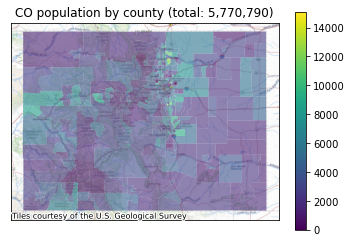

In [21]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
df.to_crs("EPSG:3857").plot("acs_value", legend=True, alpha=0.6, ax=ax)
tot = df['acs_value'].sum()
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f"CO population by county (total: {tot:,})")
ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo)
fig.savefig("co-tract-pop.png", dpi=300)
